# Iowa Housing Pricing: Modeling & Analysis

### Contents
 - [0. Pickling Work Space](#Pickling-Work-Space)
 - [I. Processing & Scaling](#Processing-&-Scaling)
 - [II. Initial Regressive Models](#Train-Initial-Regressive-Models)
     - [a. PCA Pipelined](#Regressions-with-PCA-Pipelined)
     - [b. Using GridSearchCV](#Regressions-with-GridSearchCV)
 - [III. Second Iteration: Outliers & Cook's Distance](#Second-Iteration:-Dealing-with-Outliers)
     - [a. Leverage Plot Visualization](#Leverage-Plot)
     - [b. Initial Cooked Regressions](#Model-Cooked-Regressions)
     - [c. Cooked PCA Pipelined](#Cooked-PCA-Pipeline)
     - [d. Cooked GridSearchCV](#Cooked-GridSearchCV)
     - [e. Eliminate PCA](#The-Strategy-Was-Flawed:-Eliminate-PCA)
 - [IV. Feature / Permutation Importance](#Ascertain-Feature-Importance)
     - [a. Un-Cooked Feature Importance](#Un-Cooked-Feature-Importance)
     - [b. Cooked Feature Importance](#Cooked-Feature-Importance)
     - [c. Permutation Importance](#Opting-for-Permutation-Importance)
     - [d. Focus Gradient Boosting](#We-Have-a-Winner:-Gradient-Boosting!)
 - [V. Conclusions](#Conclusions)
 - [VI. Generating & Exporting Predictions](#Generating-Predictions)

In [1]:
# Import packages etc.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

# Import data
x_train = pd.read_csv('ITrain_DSet.csv').drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv('ITrain_Test.csv').drop(['Unnamed: 0'], axis=1)
x_test = pd.read_csv('ITTest_DSet.csv').drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv('ITTest_Test.csv').drop(['Unnamed: 0'], axis=1)
sample_result = pd.read_csv('sample_submission.csv')
testset = pd.read_csv('FinalTestSet.csv').drop(['Unnamed: 0'], axis=1)


#### Pickling Work Space
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [2]:
################################
### Cheek's Pickling EXPORTS ###
################################

### PCA Optimization Run
# pickle.dump(gs_ridge, open(f'./gsridge.pkl', 'wb'))
# pickle.dump(gs_svr, open(f'./gssvr.pkl', 'wb'))
# pickle.dump(gs_randomForest, open(f'./gsrforest.pkl', 'wb'))
# pickle.dump(gs_gradientBoost, open(f'./gsgradient.pkl', 'wb'))
# pickle.dump(gs_xgForest, open(f'./gsxgforest.pkl', 'wb'))
# pickle.dump(gs_xgBooster, open(f'./gsxgbooster.pkl', 'wb'))

### PCA Optimized & Cooked Run
# pickle.dump(cooked_ridge, open(f'./cooked_ridge.pkl', 'wb'))
# pickle.dump(cooked_svr, open(f'./cooked_svr.pkl', 'wb'))
# pickle.dump(cooked_randomForest, open(f'./cooked_rf.pkl', 'wb'))
# pickle.dump(cooked_gradientBoost, open(f'./cooked_gb.pkl', 'wb'))
# pickle.dump(cooked_xgForest, open(f'./cooked_xgrf.pkl', 'wb'))
# pickle.dump(cooked_xgBooster, open(f'./cooked_xgb.pkl', 'wb'))

### NO PCA Optimization Run
# pickle.dump(optimized_ridge, open(f'./optimized_ridge.pkl', 'wb'))
# pickle.dump(optimized_svr, open(f'./optimized_svr.pkl', 'wb'))
# pickle.dump(optimized_randomForest, open(f'./optimized_rf.pkl', 'wb'))
# pickle.dump(optimized_gradientBoost, open(f'./optimized_gb.pkl', 'wb'))
# pickle.dump(optimized_XGRandomForest, open(f'./optimized_xgrf.pkl', 'wb'))
# pickle.dump(optimized_XGBooster, open(f'./optimized_xgb.pkl', 'wb'))

### NO PCA Optimized & Cooked Run
# pickle.dump(optimized_ridge2, open(f'./optimized_ridge2.pkl', 'wb'))
# pickle.dump(optimized_svr2, open(f'./optimized_svr2.pkl', 'wb'))
# pickle.dump(optimized_randomForest2, open(f'./optimized_rf2.pkl', 'wb'))
# pickle.dump(optimized_gradientBoost2, open(f'./optimized_gb2.pkl', 'wb'))
# pickle.dump(optimized_XGRandomForest2, open(f'./optimized_xgrf2.pkl', 'wb'))
# pickle.dump(optimized_XGBooster2, open(f'./optimized_xgb2.pkl', 'wb'))

In [3]:
###############################
### IMPORT Choicest Pickles ###
###############################

### PCA Optimization Run
gs_ridge = pickle.load(open('./gsridge.pkl', 'rb'))
gs_svr = pickle.load(open('./gssvr.pkl', 'rb'))
gs_randomForest = pickle.load(open('./gsrforest.pkl', 'rb'))
gs_gradientBoost = pickle.load(open('./gsgradient.pkl', 'rb'))
gs_xgForest = pickle.load(open('./gsxgforest.pkl', 'rb'))
gs_xgBooster = pickle.load(open('./gsxgbooster.pkl', 'rb'))

### PCA Optimized & Cooked Run
cooked_ridge = pickle.load(open('./cooked_ridge.pkl', 'rb'))
cooked_svr = pickle.load(open('./cooked_svr.pkl', 'rb'))
cooked_randomForest = pickle.load(open('./cooked_rf.pkl', 'rb'))
cooked_gradientBoost = pickle.load(open('./cooked_gb.pkl', 'rb'))
cooked_xgForest = pickle.load(open('./cooked_xgrf.pkl', 'rb'))
cooked_xgBoost = pickle.load(open('./cooked_xgb.pkl', 'rb'))

### NO PCA Optimization Run
optimized_ridge = pickle.load(open('./optimized_ridge.pkl', 'rb'))
optimized_svr = pickle.load(open('./optimized_svr.pkl', 'rb'))
optimized_randomForest = pickle.load(open('./optimized_rf.pkl', 'rb'))
optimized_gradientBoost = pickle.load(open('./optimized_gb.pkl', 'rb'))
optimized_XGRandomForest = pickle.load(open('./optimized_xgrf.pkl', 'rb'))
optimized_XGBooster = pickle.load(open('./optimized_xgb.pkl', 'rb'))

### NO PCA Optimized & Cooked Run
optimized_ridge2 = pickle.load(open('./optimized_ridge2.pkl', 'rb'))
optimized_svr2 = pickle.load(open('./optimized_svr2.pkl', 'rb'))
optimized_randomForest2 = pickle.load(open('./optimized_rf2.pkl', 'rb'))
optimized_gradientBoost2 = pickle.load(open('./optimized_gb2.pkl', 'rb'))
optimized_XGRandomForest2 = pickle.load(open('./optimized_xgrf2.pkl', 'rb'))
optimized_XGBooster2 = pickle.load(open('./optimized_xgb2.pkl', 'rb'))

# Processing & Scaling
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

As we have already imported fully cleaned and prepared data, we merely need to begin the processing. To start, we will scale the data using SKLearn's **StandardScaler**.

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale data & save scaler model
scale = StandardScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train),   # Fit & Transform Train
                      columns=x_train.columns.to_list())
x_test = pd.DataFrame(scale.transform(x_test),         # Transform Test Per Train
                     columns=x_test.columns.to_list())
pickle.dump(scale, open('./scale.pkl', 'wb'))          # Save Scale Pickle

# Train Initial Regressive Models
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

In order to attempt a broad analysis of our data, we will include classical, sklearn regression techniques, ranging from **Ridge & Lasso regressions** to svm's **Support Vector Regression**, and further to ensemble's **Random Forest Regressor** as well as **Gradient Boosting Regressor**.

We will complement our analysis with the popular *XGBoost* **Random Forest Regressor** and **Gradient Boosting Regressor** to compare their results with those of the native sklearn package.

In [5]:
from sklearn import linear_model, svm, ensemble
import xgboost as xgb

#####################
### Define Models ###
#####################

ridge = linear_model.Ridge()
svr = svm.SVR(kernel='linear')
randomForest = ensemble.RandomForestRegressor(n_jobs = -2,random_state = 430)
gradientBoost = ensemble.GradientBoostingRegressor(random_state = 430)
xgForest = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)
xgBooster = xgb.XGBRegressor(n_jobs = -2, random_state = 430)

models = [ridge, svr, randomForest, gradientBoost, xgForest, xgBooster]

# Make results df
resul = pd.DataFrame(columns = ['Model', 'Ridge', 'SVR', 'RForest', 'GBoost', 'XGRForest', 'XGBoost'])
resul.set_index("Model", inplace = True)
resul.loc['Default_Train'] = [0, 0, 0, 0, 0, 0]
resul.loc['Default_Test'] = [0, 0, 0, 0, 0, 0]
resul.loc['PCADefault_Train'] = [0, 0, 0, 0, 0, 0]
resul.loc['PCADefault_Test'] = [0, 0, 0, 0, 0, 0]
resul.loc['OptimizedPCA_Train'] = [0, 0, 0, 0, 0, 0]
resul.loc['OptimizedPCA_Test'] = [0, 0, 0, 0, 0, 0]

##########################################
### Build & Test Models w/o GridSearch ###
##########################################

col = 0
for model in models:
    model.fit(x_train, y_train['SalePrice'])
    resul.iloc[0, col] = model.score(x_train, y_train['SalePrice'])
    resul.iloc[1, col] = model.score(x_test, y_test['SalePrice'])
    col += 1

resul.head(6)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0,0,0,0,0,0
PCADefault_Test,0,0,0,0,0,0
OptimizedPCA_Train,0,0,0,0,0,0
OptimizedPCA_Test,0,0,0,0,0,0


## Regressions with PCA Pipelined
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#
pca_p = PCA(n_components=0.99, random_state=430, svd_solver='full')
ridgep = linear_model.Ridge()
svrp = svm.SVR(kernel='linear')
rforestp = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)
gboostp = ensemble.GradientBoostingRegressor(random_state=430)
xgrfp = xgb.XGBRFRegressor(n_jobs=-2, random_state=430)
xgbp = xgb.XGBRegressor(n_jobs=-2, random_state=430)

#
ridgep = Pipeline(steps=[('pca', pca_p), 
                         ('ridge', linear_model.Ridge())])
svrp = Pipeline(steps=[('pca', pca_p),
                      ('model', svm.SVR())])
rforestp = Pipeline(steps=[('pca', pca_p),
                          ('model', rforestp)])
gboostp = Pipeline(steps=[('pca', pca_p),
                         ('model', gboostp)])
xgrfp = Pipeline(steps=[('pca', pca_p),
                       ('model', xgrfp)])
xgbp = Pipeline(steps=[('pca', pca_p),
                      ('model', xgbp)])

models2 = [ridgep, svrp, rforestp, gboostp, xgrfp, xgbp]

#
col = 0
for model in models2:
    model.fit(x_train, y_train['SalePrice'])
    resul.iloc[2, col] = model.score(x_train, y_train['SalePrice'])
    resul.iloc[3, col] = model.score(x_test, y_test['SalePrice'])
    col += 1
    
resul.head(6)

# resul.head(6)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0,0,0,0,0,0
OptimizedPCA_Test,0,0,0,0,0,0


## Regressions with GridSearchCV
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

From here we can see that we may need to adjust some parameters to yield better results. In order to achieve our goals, we will implement the classic **GridSearchCV** from SKLearn's model_selection.

In order to save on processing time, we will split each process into its own cell, duplicating syntax for readability and ease of tweaking.

In [7]:
###################
### Ridge Model ###
###################

# import new toys
from sklearn import model_selection

# reset items
ridge2 = linear_model.Ridge()
pca = PCA(random_state=430)

# pipe & search
ridge_grid = {'pca__n_components': [0.99],
             'model__alpha': [0.01, 0.1, 1, 10, 100, 1000]}
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', ridge2)])
gs_ridge = model_selection.GridSearchCV(pipeline, ridge_grid, n_jobs=-2, cv=3)
gs_ridge.fit(x_train, y_train['SalePrice'])
print('Ridge Regressor Params: ' + str(gs_ridge.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 0] = gs_ridge.score(x_train, y_train['SalePrice'])
resul.iloc[5, 0] = gs_ridge.score(x_test, y_test['SalePrice'])
resul.head(6)

Ridge Regressor Params: {'model__alpha': 1000, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0,0,0,0,0
OptimizedPCA_Test,0.854558,0,0,0,0,0


In [8]:
############################
### Support Vector Model ###
############################

# reset items
svr2 = svm.SVR()
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', svr2)])
svr_grid = {'pca__n_components': [0.99],
           'model__kernel': ['linear', 'poly', 'rbf'],
           'model__C': [0.01, 0.1, 1, 10, 100, 1000],
           'model__gamma': ['scale']}
gs_svr = model_selection.GridSearchCV(pipeline, svr_grid, n_jobs=-2, cv=3)
gs_svr.fit(x_train, y_train['SalePrice'])
print('Ridge Regressor Params: ' + str(gs_svr.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 1] = gs_svr.score(x_train, y_train['SalePrice'])
resul.iloc[5, 1] = gs_svr.score(x_test, y_test['SalePrice'])
resul.head(6)

Ridge Regressor Params: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear', 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0,0,0,0
OptimizedPCA_Test,0.854558,0.859421,0,0,0,0


In [9]:
###############################
### Random Forest Regressor ###
###############################

randomForest2 = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', randomForest2)])
rf_grid = {'pca__n_components': [0.99],
          'model__n_estimators': [500, 750, 1000],
          'model__max_features': ['auto', 'sqrt', 'log2'],
          'model__max_depth': [10, 11, 12, None],
          'model__min_samples_split': [2, 5, 10],
          'model__min_samples_leaf': [1, 2, 4]}
gs_randomForest = model_selection.GridSearchCV(pipeline, rf_grid, n_jobs=-2, cv=3)
gs_randomForest.fit(x_train, y_train['SalePrice'])
print('RandomForest Params: ' + str(gs_randomForest.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 2] = gs_randomForest.score(x_train, y_train['SalePrice'])
resul.iloc[5, 2] = gs_randomForest.score(x_test, y_test['SalePrice'])
resul.head(6)

RandomForest Params: {'model__max_depth': 11, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 750, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,0,0,0
OptimizedPCA_Test,0.854558,0.859421,0.861758,0,0,0


In [10]:
################################
### Gradient Boost Regressor ###
################################

gradientBoost2 = ensemble.GradientBoostingRegressor(random_state=430)
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', gradientBoost2)])
gb_grid = {'pca__n_components': [0.99],
          'model__min_samples_split': [2, 5, 10],
          'model__min_samples_leaf': [1, 2, 4],
          'model__n_estimators': [500, 750, 1000],
          'model__max_depth': [4, 5, 6, None]}
gs_gradientBoost = model_selection.GridSearchCV(pipeline, gb_grid, n_jobs=-2, cv=3)
gs_gradientBoost.fit(x_train, y_train['SalePrice'])
print('GradientBoost Params: ' + str(gs_gradientBoost.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 3] = gs_gradientBoost.score(x_train, y_train['SalePrice'])
resul.iloc[5, 3] = gs_gradientBoost.score(x_test, y_test['SalePrice'])
resul.head(6)

GradientBoost Params: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 750, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,1.0,0,0
OptimizedPCA_Test,0.854558,0.859421,0.861758,0.875904,0,0


In [11]:
#################################
### XGRandom Forest Regressor ###
#################################

xgForest2 = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)
pca = PCA(random_state=430)

# Pipe & Search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', xgForest2)])
xgf_grid = {'model__n_estimators': [100, 250, 500, 750],
           'model__max_depth': [6, 10, 14, 18, 22, 26],
           'model__gamma': [0, 2, 4]}
gs_xgForest = model_selection.GridSearchCV(pipeline, xgf_grid, n_jobs=-2, cv=3)
gs_xgForest.fit(x_train, y_train['SalePrice'])
print('XGRandomForest Params: ' + str(gs_xgForest.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 4] = gs_xgForest.score(x_train, y_train['SalePrice'])
resul.iloc[5, 4] = gs_xgForest.score(x_test, y_test['SalePrice'])
resul.head(6)

XGRandomForest Params: {'model__gamma': 0, 'model__max_depth': 14, 'model__n_estimators': 500}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,1.0,0.986777,0
OptimizedPCA_Test,0.854558,0.859421,0.861758,0.875904,0.861007,0


In [12]:
#########################
### XGBoost Regressor ###
#########################

xgBooster2 = xgb.XGBRegressor(n_jobs = -2, random_state = 430)
pca = PCA(random_state=430)

# Pipe & Search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', xgBooster2)])
xgb_grid = {'pca__n_components': range(50, x_train.shape[1]),
            'model__n_estimators': [100, 250, 500],
            'model__max_depth': [2, 3, 4, 5],
            'model__gamma': [0, 1, 2, 3]}
gs_xgBooster = model_selection.GridSearchCV(pipeline, xgb_grid, n_jobs=-2, cv=3)
gs_xgBooster.fit(x_train, y_train['SalePrice'])
print('XGBooster Params: ' + str(gs_xgBooster.best_params_))

# Tabulate Train Score & Test Score
resul.iloc[4, 5] = gs_xgBooster.score(x_train, y_train['SalePrice'])
resul.iloc[5, 5] = gs_xgBooster.score(x_test, y_test['SalePrice'])
resul.head(6)

XGBooster Params: {'model__gamma': 0, 'model__max_depth': 2, 'model__n_estimators': 100, 'pca__n_components': 100}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,1.0,0.986777,0.959371
OptimizedPCA_Test,0.854558,0.859421,0.861758,0.875904,0.861007,0.856726


# Second Iteration: Dealing with Outliers

[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [13]:
# Get OLS Info
import statsmodels.api as sms

x_addconst = sms.add_constant(x_train)
OLS = sms.OLS(y_train, x_addconst)
result_ols = OLS.fit()

print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:14   Log-Likelihood:                -13260.
No. Observations:                1168   AIC:                         2.698e+04
Df Residuals:                     939   BIC:                         2.814e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.797e+

In [14]:
# Focus in on Influences
influence = result_ols.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    1168.000000
mean        0.196061
std         0.169858
min        -0.044114
25%         0.096158
50%         0.141082
75%         0.229474
max         1.000000
dtype: float64

In [15]:
# Get Influence Summary Frame
infl_summaryfr = influence.summary_frame()
infl_summaryfr.head(3)

/home/theodore/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/home/theodore/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/home/theodore/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:713: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/home/theodore/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:733: RuntimeWarning: divide by zero encountered in true_divide
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/home/theodore/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_intern

,dfb_const,dfb_LotFrontage,dfb_LotArea,dfb_OverallQual,dfb_OverallCond,dfb_YrsSinceBlt,dfb_YrsSinceRemod,dfb_MasVnrArea,dfb_BsmtUnfSF,dfb_TotalBsmtSF,...,dfb_FireplaceQu,dfb_GarageFinish,dfb_GarageQual,dfb_GarageCond,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.321284,0.189120,0.006737,-0.004514,0.012875,0.017413,0.057582,-0.000602,0.018442,-0.033877,...,0.022928,0.035159,0.020313,-0.017721,-1.544193e-05,0.311802,-0.044114,NaN,0.312015,NaN
1,0.081099,-0.058864,-0.001272,0.014901,-0.009589,-0.001140,0.015503,-0.007617,0.005185,-0.001236,...,0.002863,0.015044,0.006680,0.000377,-1.144510e-07,-0.033632,-0.027660,NaN,-0.033698,NaN
2,-0.025873,-0.047203,0.005213,-0.020419,-0.007519,0.009157,0.011618,0.009511,0.009783,-0.005822,...,0.002588,0.009336,0.008037,0.000656,2.322902e-08,-0.004920,0.203329,-0.002486,-0.004931,-0.002491


## Leverage Plot
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


/home/theodore/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

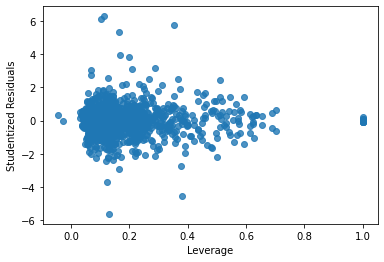

In [16]:
# Plot Leverage of Data
lever = influence.hat_matrix_diag
sns.regplot(lever, result_ols.resid_pearson, fit_reg=False)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [17]:
# Combine Summary Frame & Prices
infl_sum = pd.concat([y_train['SalePrice'], infl_summaryfr], axis=1)
infl_sum = infl_sum.rename(columns={'hat_diag': 'leverage'})
infl_sum.head()

,SalePrice,dfb_const,dfb_LotFrontage,dfb_LotArea,dfb_OverallQual,dfb_OverallCond,dfb_YrsSinceBlt,dfb_YrsSinceRemod,dfb_MasVnrArea,dfb_BsmtUnfSF,...,dfb_FireplaceQu,dfb_GarageFinish,dfb_GarageQual,dfb_GarageCond,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,93000,-0.321284,0.189120,0.006737,-0.004514,0.012875,0.017413,0.057582,-0.000602,0.018442,...,0.022928,0.035159,0.020313,-0.017721,-1.544193e-05,0.311802,-0.044114,NaN,0.312015,NaN
1,172500,0.081099,-0.058864,-0.001272,0.014901,-0.009589,-0.001140,0.015503,-0.007617,0.005185,...,0.002863,0.015044,0.006680,0.000377,-1.144510e-07,-0.033632,-0.027660,NaN,-0.033698,NaN
2,135000,-0.025873,-0.047203,0.005213,-0.020419,-0.007519,0.009157,0.011618,0.009511,0.009783,...,0.002588,0.009336,0.008037,0.000656,2.322902e-08,-0.004920,0.203329,-0.002486,-0.004931,-0.002491
3,100000,0.005254,-0.067018,-0.011026,-0.000665,-0.008998,-0.022258,-0.003271,0.007359,-0.009381,...,-0.002241,-0.003564,0.000262,0.009551,5.189086e-05,-0.248450,0.182747,-0.117486,-0.248962,-0.117728
4,261500,0.127692,-0.024602,0.003121,0.020052,-0.001161,-0.009235,0.020470,0.002643,0.006410,...,0.010190,0.002625,0.008759,0.003490,1.424852e-07,-0.021926,0.073078,-0.006156,-0.021967,-0.006168


In [18]:
# Isolate Outliers via Cook's Distance from Influence Mtx
cutoff = 4/x_train.shape[0]
cookdf = pd.DataFrame((infl_sum.SalePrice[abs(infl_sum.cooks_d) > cutoff]))
cook_outliers = [*cookdf.index]
print(cook_outliers)

[35, 54, 56, 57, 62, 123, 129, 162, 163, 169, 193, 202, 226, 240, 264, 270, 272, 275, 280, 288, 289, 296, 303, 334, 339, 367, 371, 386, 410, 414, 434, 444, 451, 455, 462, 464, 473, 474, 492, 508, 521, 523, 529, 532, 541, 542, 550, 551, 573, 574, 599, 627, 668, 673, 682, 684, 691, 699, 700, 705, 711, 713, 720, 721, 726, 739, 749, 751, 765, 768, 789, 834, 842, 870, 883, 915, 921, 926, 938, 954, 958, 974, 977, 997, 1013, 1016, 1024, 1026, 1027, 1055, 1057, 1063, 1066, 1071, 1077, 1080, 1084, 1089, 1094, 1101, 1136, 1146, 1154, 1165]


In [19]:
############################
### Generate Cooked Data ###
############################

# Cook Data
cooked_xtrain = x_train.copy()
cooked_ytrain = y_train.copy()

cooked_xtrain.drop(cook_outliers, axis=0, inplace=True)
cooked_ytrain.drop(cook_outliers, axis=0, inplace=True)

# Model Cooked Regressions
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [49]:
#######################
### Redefine Models ###
#######################

ridge2 = linear_model.Ridge()
svr2 = svm.SVR(kernel='linear')
randomForest2 = ensemble.RandomForestRegressor(n_jobs = -2,random_state = 430)
gradientBoost2 = ensemble.GradientBoostingRegressor(random_state = 430)
xgForest2 = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)
xgBooster2 = xgb.XGBRegressor(n_jobs = -2, random_state = 430)

models = [ridge2, svr2, randomForest2, gradientBoost2, xgForest2, xgBooster2]

# Make results df
cooked_resul = pd.DataFrame(columns = ['Model', 'Ridge', 'SVR', 'RForest', 'GBoost', 'XGRForest', 'XGBoost'])
cooked_resul.set_index("Model", inplace = True)
cooked_resul.loc['CookDefault_Train'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['CookDefault_Test'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['CookPCA_Train'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['CookPCA_Test'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['CookOptimized_Train'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['CookOptimized_Test'] = [0, 0, 0, 0, 0, 0]

##########################################
### Build & Test Models w/o GridSearch ###
##########################################

col = 0
for model in models:
    model.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
    cooked_resul.iloc[0, col] = model.score(cooked_xtrain, cooked_ytrain['SalePrice'])
    cooked_resul.iloc[1, col] = model.score(x_test, y_test['SalePrice'])
    col += 1

cooked_resul.head(6)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0,0,0,0,0,0
CookPCA_Test,0,0,0,0,0,0
CookOptimized_Train,0,0,0,0,0,0
CookOptimized_Test,0,0,0,0,0,0


## Cooked PCA Pipeline
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Reset Models
pca_p2 = PCA(n_components=0.99, random_state=430, svd_solver='full')
ridgep2 = linear_model.Ridge()
svrp2 = svm.SVR(kernel='linear')
rforestp2 = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)
gboostp2 = ensemble.GradientBoostingRegressor(random_state=430)
xgrfp2 = xgb.XGBRFRegressor(n_jobs=-2, random_state=430)
xgbp2 = xgb.XGBRegressor(n_jobs=-2, random_state=430)

# Generate Pipelines
ridgep2 = Pipeline(steps=[('pca', pca_p2), 
                         ('ridge', ridgep2)])
svrp2 = Pipeline(steps=[('pca', pca_p2),
                      ('model', svrp2)])
rforestp2 = Pipeline(steps=[('pca', pca_p2),
                          ('model', rforestp2)])
gboostp2 = Pipeline(steps=[('pca', pca_p2),
                         ('model', gboostp2)])
xgrfp2 = Pipeline(steps=[('pca', pca_p2),
                       ('model', xgrfp2)])
xgbp2 = Pipeline(steps=[('pca', pca_p2),
                      ('model', xgbp2)])

models = [ridgep2, svrp2, rforestp2, gboostp2, xgrfp2, xgbp2]

col = 0
for model in models:
    model.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
    cooked_resul.iloc[2, col] = model.score(cooked_xtrain, cooked_ytrain['SalePrice'])
    cooked_resul.iloc[3, col] = model.score(x_test, y_test['SalePrice'])
    col += 1
    
cooked_resul.head(6)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0,0,0,0,0,0
CookOptimized_Test,0,0,0,0,0,0


## Cooked GridSearchCV
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [22]:
###################
### Ridge Model ###
###################

# import new toys
from sklearn import model_selection

# reset items
ridge2 = linear_model.Ridge()
pca = PCA(random_state=430)

# pipe & search
ridge_grid = {'pca__n_components': [0.99],
             'model__alpha': np.arange(270, 280, 0.1)}
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', ridge2)])
cooked_ridge = model_selection.GridSearchCV(pipeline, ridge_grid, n_jobs=-2, cv=3)
cooked_ridge.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('Ridge Regressor Params: ' + str(cooked_ridge.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 0] = cooked_ridge.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 0] = cooked_ridge.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

Ridge Regressor Params: {'model__alpha': 272.90000000000066, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0,0,0,0,0
CookOptimized_Test,0.868489,0,0,0,0,0


In [23]:
############################
### Support Vector Model ###
############################

# reset items
svr2 = svm.SVR(kernel='linear')
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', svr2)])
svr_grid = {'pca__n_components': [0.99],
           'model__C': np.arange(128, 140, 0.1),
           'model__epsilon': np.arange(998, 1000, 0.1)}
cooked_svr = model_selection.GridSearchCV(pipeline, svr_grid, n_jobs=-2, cv=3)
cooked_svr.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('Ridge Regressor Params: ' + str(cooked_svr.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 1] = cooked_svr.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 1] = cooked_svr.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

Ridge Regressor Params: {'model__C': 129.29999999999993, 'model__epsilon': 999.9000000000004, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0,0,0,0
CookOptimized_Test,0.868489,0.862268,0,0,0,0


In [24]:
###############################
### Random Forest Regressor ###
###############################

randomForest2 = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', randomForest2)])
rf_grid = {'pca__n_components': [0.99],
          'model__n_estimators': [500, 750, 1000],
          'model__max_features': ['auto', 'sqrt', 'log2'],
          'model__max_depth': [10, 11, 12, None],
          'model__min_samples_split': [2, 5, 10],
          'model__min_samples_leaf': [1, 2, 4]}
cooked_randomForest = model_selection.GridSearchCV(pipeline, rf_grid, n_jobs=-2, cv=3)
cooked_randomForest.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('RandomForest Params: ' + str(cooked_randomForest.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 2] = cooked_randomForest.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 2] = cooked_randomForest.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

RandomForest Params: {'model__max_depth': 10, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 500, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0.962963,0,0,0
CookOptimized_Test,0.868489,0.862268,0.837503,0,0,0


In [25]:
################################
### Gradient Boost Regressor ###
################################

gradientBoost2 = ensemble.GradientBoostingRegressor(random_state=430)
pca = PCA(random_state=430)

# pipe & search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', gradientBoost2)])
gb_grid = {'pca__n_components': [0.99],
          'model__min_samples_split': [2, 5, 10],
          'model__min_samples_leaf': [1, 2, 4],
          'model__n_estimators': [500, 750, 1000],
          'model__max_depth': [4, 5, 6, None]}
cooked_gradientBoost = model_selection.GridSearchCV(pipeline, gb_grid, n_jobs=-2, cv=3)
cooked_gradientBoost.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('GradientBoost Params: ' + str(cooked_gradientBoost.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 3] = cooked_gradientBoost.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 3] = cooked_gradientBoost.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

GradientBoost Params: {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 1000, 'pca__n_components': 0.99}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0.962963,1.0,0,0
CookOptimized_Test,0.868489,0.862268,0.837503,0.860892,0,0


In [26]:
#################################
### XGRandom Forest Regressor ###
#################################

xgForest2 = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)
pca = PCA(random_state=430)

# Pipe & Search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', xgForest2)])
xgf_grid = {'model__n_estimators': [100, 250, 500, 750],
           'model__max_depth': [6, 10, 14, 18, 22, 26],
           'model__gamma': [0, 2, 4]}
cooked_xgForest = model_selection.GridSearchCV(pipeline, xgf_grid, n_jobs=-2, cv=3)
cooked_xgForest.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('XGRandomForest Params: ' + str(cooked_xgForest.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 4] = cooked_xgForest.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 4] = cooked_xgForest.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

XGRandomForest Params: {'model__gamma': 0, 'model__max_depth': 18, 'model__n_estimators': 500}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0.962963,1.0,0.985607,0
CookOptimized_Test,0.868489,0.862268,0.837503,0.860892,0.835072,0


In [27]:
#########################
### XGBoost Regressor ###
#########################

xgBooster2 = xgb.XGBRegressor(n_jobs = -2, random_state = 430)
pca = PCA(random_state=430)

# Pipe & Search
pipeline = Pipeline(steps=[('pca', pca),
                          ('model', xgBooster2)])
xgb_grid = {'pca__n_components': range(50, x_train.shape[1]),
            'model__n_estimators': [100, 250, 500],
            'model__max_depth': [2, 3, 4, 5],
            'model__gamma': [0, 1, 2, 3]}
cooked_xgBoost = model_selection.GridSearchCV(pipeline, xgb_grid, n_jobs=-2, cv=3)
cooked_xgBoost.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('XGBooster Params: ' + str(cooked_xgBoost.best_params_))

# Tabulate Train Score & Test Score
cooked_resul.iloc[4, 5] = cooked_xgBoost.score(cooked_xtrain, cooked_ytrain['SalePrice'])
cooked_resul.iloc[5, 5] = cooked_xgBoost.score(x_test, y_test['SalePrice'])
cooked_resul.head(6)

XGBooster Params: {'model__gamma': 0, 'model__max_depth': 2, 'model__n_estimators': 500, 'pca__n_components': 167}


,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0.962963,1.0,0.985607,0.998982
CookOptimized_Test,0.868489,0.862268,0.837503,0.860892,0.835072,0.865133


# The Strategy Was Flawed: Eliminate PCA
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In [28]:
###################################
### Optimized Ridge NOPCA Model ###
###################################

# reset items
ridge_opt1 = linear_model.Ridge()

# pipe & search
ridge_grid = {'alpha': np.arange(320, 340, 1)}
optimized_ridge = model_selection.GridSearchCV(ridge_opt1, ridge_grid, n_jobs=-2, cv=3)
optimized_ridge.fit(x_train, y_train['SalePrice'])
print('Ridge Regressor Params: ' + str(optimized_ridge.best_params_))

Ridge Regressor Params: {'alpha': 331}


In [29]:
############################
### Optimized SVR Model ###
############################

# reset items
svr_opt1 = svm.SVR()

# pipe & search
svr_grid = {'kernel': ['linear'],
           'C': np.arange(160, 180, 1),
           'gamma': ['scale']}
optimized_svr = model_selection.GridSearchCV(svr_opt1, svr_grid, n_jobs=-2, cv=3)
optimized_svr.fit(x_train, y_train['SalePrice'])
print('Ridge Regressor Params: ' + str(optimized_svr.best_params_))

Ridge Regressor Params: {'C': 167, 'gamma': 'scale', 'kernel': 'linear'}


In [30]:
###############################
### Random Forest Regressor ###
###############################

optimized_rf1 = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)

# pipe & search
rf_grid = {'n_estimators': [750, 1000, 1250],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth': [10, 11, 12, None],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2, 3]}
optimized_randomForest = model_selection.GridSearchCV(optimized_rf1, rf_grid, n_jobs=-2, cv=3)
optimized_randomForest.fit(x_train, y_train['SalePrice'])
print('RandomForest Params: ' + str(optimized_randomForest.best_params_))

RandomForest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [31]:
################################
### Gradient Boost Regressor ###
################################

optimized_gb1 = ensemble.GradientBoostingRegressor(random_state=430)

# pipe & search
gb_grid = {'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2, 3],
          'n_estimators': [500, 750, 1000],
          'max_depth': [2, 3, 4, 5]}
optimized_gradientBoost = model_selection.GridSearchCV(optimized_gb1, gb_grid, n_jobs=-2, cv=3)
optimized_gradientBoost.fit(x_train, y_train['SalePrice'])
print('GradientBoost Params: ' + str(optimized_gradientBoost.best_params_))

GradientBoost Params: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000}


In [32]:
#################################
### XGRandom Forest Regressor ###
#################################

optimized_xgrf1 = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)

# Pipe & Search
xgf_grid = {'n_estimators': [250, 500, 750],
           'max_depth': [20, 21, 22, 23, 24],
           'gamma': [0, 0.1, 0.5, 0.9, 1]}
optimized_XGRandomForest = model_selection.GridSearchCV(optimized_xgrf1, xgf_grid, n_jobs=-2, cv=3)
optimized_XGRandomForest.fit(x_train, y_train['SalePrice'])
print('XGRandomForest Params: ' + str(optimized_XGRandomForest.best_params_))

XGRandomForest Params: {'gamma': 0, 'max_depth': 21, 'n_estimators': 500}


In [33]:
#########################
### XGBoost Regressor ###
#########################

optimized_xgb1 = xgb.XGBRegressor(n_jobs = -2, random_state = 430)

# Pipe & Search
xgb_grid = {'n_estimators': [500, 750, 1000],
            'max_depth': [2, 3, 4],
            'gamma': [0, 0.1, 0.5, 0.9, 1]}
optimized_XGBooster = model_selection.GridSearchCV(optimized_xgb1, xgb_grid, n_jobs=-2, cv=3)
optimized_XGBooster.fit(x_train, y_train['SalePrice'])
print('XGBooster Params: ' + str(optimized_XGBooster.best_params_))

XGBooster Params: {'gamma': 0, 'max_depth': 2, 'n_estimators': 750}


### Cooked Optimizations

In [34]:
###################################
### Optimized Ridge NOPCA Model ###
###################################

# reset items
ridge_opt2 = linear_model.Ridge()

# pipe & search
ridge_grid = {'alpha': np.arange(260, 280, 1)}
optimized_ridge2 = model_selection.GridSearchCV(ridge_opt2, ridge_grid, n_jobs=-2, cv=3)
optimized_ridge2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('Ridge Regressor Params: ' + str(optimized_ridge2.best_params_))

Ridge Regressor Params: {'alpha': 274}


In [35]:
############################
### Optimized SVR Model ###
############################

# reset items
svr_opt2 = svm.SVR()

# pipe & search
svr_grid = {'kernel': ['linear'],
           'C': np.arange(120, 140, 1),
           'gamma': ['scale']}
optimized_svr2 = model_selection.GridSearchCV(svr_opt2, svr_grid, n_jobs=-2, cv=3)
optimized_svr2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('Ridge Regressor Params: ' + str(optimized_svr2.best_params_))

Ridge Regressor Params: {'C': 130, 'gamma': 'scale', 'kernel': 'linear'}


In [36]:
###############################
### Random Forest Regressor ###
###############################

optimized_rf2 = ensemble.RandomForestRegressor(n_jobs=-2, random_state=430)

# pipe & search
rf_grid = {'n_estimators': [500, 750, 1000],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth': [10, 11, 12, None],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [2, 3, 4, 5, 6]}
optimized_randomForest2 = model_selection.GridSearchCV(optimized_rf2, rf_grid, n_jobs=-2, cv=3)
optimized_randomForest2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('RandomForest Params: ' + str(optimized_randomForest2.best_params_))

RandomForest Params: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 750}


In [37]:
################################
### Gradient Boost Regressor ###
################################

optimized_gb2 = ensemble.GradientBoostingRegressor(random_state=430)

# pipe & search
gb_grid = {'min_samples_split': [8, 9, 10, 11, 12],
          'min_samples_leaf': [1, 2, 3],
          'n_estimators': [250, 500, 750],
          'max_depth': [4, 5, 6]}
optimized_gradientBoost2 = model_selection.GridSearchCV(optimized_gb2, gb_grid, n_jobs=-2, cv=3)
optimized_gradientBoost2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('GradientBoost Params: ' + str(optimized_gradientBoost2.best_params_))

GradientBoost Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


In [38]:
#################################
### XGRandom Forest Regressor ###
#################################

optimized_xgrf2 = xgb.XGBRFRegressor(n_jobs = -2, random_state = 430)

# Pipe & Search
xgf_grid = {'n_estimators': [100, 250, 400],
           'max_depth': [18, 19, 20, 21, 22],
           'gamma': [0, 0.1, 0.5, 0.9, 1]}
optimized_XGRandomForest2 = model_selection.GridSearchCV(optimized_xgrf2, xgf_grid, n_jobs=-2, cv=3)
optimized_XGRandomForest2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('XGRandomForest Params: ' + str(optimized_XGRandomForest2.best_params_))

XGRandomForest Params: {'gamma': 0, 'max_depth': 20, 'n_estimators': 250}


In [39]:
#########################
### XGBoost Regressor ###
#########################

optimized_xgb2 = xgb.XGBRegressor(n_jobs = -2, random_state = 430)

# Pipe & Search
xgb_grid = {'n_estimators': [300, 400, 500],
           'max_depth': [2, 3, 4],
           'gamma': [0, 0.25, 0.5, 0.75, 1]}
optimized_XGBooster2 = model_selection.GridSearchCV(optimized_xgb2, xgb_grid, n_jobs=-2, cv=3)
optimized_XGBooster2.fit(cooked_xtrain, cooked_ytrain['SalePrice'])
print('XGBooster Params: ' + str(optimized_XGBooster2.best_params_))

XGBooster Params: {'gamma': 0, 'max_depth': 2, 'n_estimators': 400}


In [40]:
# resul.head()
# cooked_resul.head()

resul.head(6)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,1.0,0.986777,0.959371
OptimizedPCA_Test,0.854558,0.859421,0.861758,0.875904,0.861007,0.856726


In [41]:
# Add Rows to Graphs
resul.loc['NOPCAOptimized_Train'] = [0, 0, 0, 0, 0, 0]
resul.loc['NOPCAOptimized_Test'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['NOPCAOptimized_Train'] = [0, 0, 0, 0, 0, 0]
cooked_resul.loc['NOPCAOptimized_Test'] = [0, 0, 0, 0, 0, 0]

In [42]:
vers1 = [optimized_ridge, optimized_svr, optimized_randomForest,
        optimized_gradientBoost, optimized_XGRandomForest, optimized_XGBooster]

vers2 = [optimized_ridge2, optimized_svr2, optimized_randomForest2,
        optimized_gradientBoost2, optimized_XGRandomForest2, optimized_XGBooster2]
col1 = 0
col2 = 0

for model in vers1:
    resul.iloc[6, col1] = model.score(x_train, y_train['SalePrice'])
    resul.iloc[7, col1] = model.score(x_test, y_test['SalePrice'])
    col1 += 1
    
for model in vers2:
    cooked_resul.iloc[6, col2] = model.score(cooked_xtrain, cooked_ytrain['SalePrice'])
    cooked_resul.iloc[7, col2] = model.score(x_test, y_test['SalePrice'])
    col2 += 1

In [43]:
resul.head(8)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
Default_Train,0.930239,0.200801,0.972468,0.970537,0.946905,0.999669
Default_Test,0.729134,0.181552,0.879944,0.920406,0.870269,0.871071
PCADefault_Train,0.906358,-0.046969,0.972615,0.972227,0.944913,1.0
PCADefault_Test,0.842698,-0.075242,0.863165,0.86956,0.846511,0.846602
OptimizedPCA_Train,0.872866,0.844854,0.972381,1.0,0.986777,0.959371
OptimizedPCA_Test,0.854558,0.859421,0.861758,0.875904,0.861007,0.856726
NOPCAOptimized_Train,0.907966,0.873272,0.976325,0.990738,0.99301,0.996863
NOPCAOptimized_Test,0.867558,0.863905,0.880733,0.928046,0.889136,0.923011


In [44]:
cooked_resul.head(8)

,Ridge,SVR,RForest,GBoost,XGRForest,XGBoost
Model,,,,,,
CookDefault_Train,0.958415,0.213081,0.976465,0.975735,0.950145,0.999816
CookDefault_Test,0.82881,0.152136,0.864557,0.894376,0.849166,0.873021
CookPCA_Train,0.93877,0.213062,0.973201,0.976793,0.949182,1.0
CookPCA_Test,0.876975,0.152041,0.826123,0.852878,0.814083,0.842671
CookOptimized_Train,0.930207,0.894968,0.962963,1.0,0.985607,0.998982
CookOptimized_Test,0.868489,0.862268,0.837503,0.860892,0.835072,0.865133
NOPCAOptimized_Train,0.937206,0.907583,0.948009,0.999803,0.994289,0.992215
NOPCAOptimized_Test,0.882177,0.878069,0.871754,0.897846,0.872699,0.909077


# Ascertain Feature Importance
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

Best practice follows that we obtain the feature importance of best-performing models. We can see these below, easily obtained for randomForest and gradientBoost models. However, according to research into the feature importance methodology, ascertaining *permutation importance* instead may be more accurate, which we shall perform below.

## Un-Cooked Feature Importance

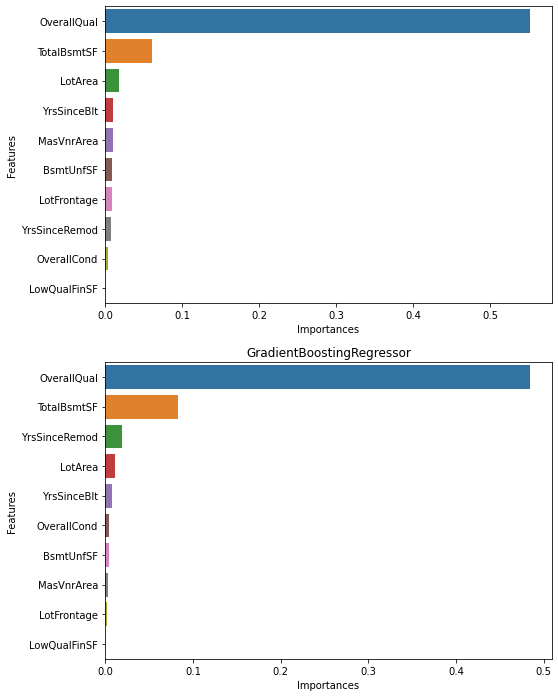

In [45]:
standards = [randomForest, gradientBoost]
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

for ax, standard in zip(axs.flat, standards):
    importance_df = pd.DataFrame({'Features': list(x_train.columns), 
                                  'Importances': list(standard.feature_importances_)}).head(10)
    importance_df.sort_values(by='Importances', ascending=False, inplace=True)
    
    # Plot Everything
    plt.title(str(standard).split('(')[0])
    sns.barplot(x=importance_df['Importances'], y=importance_df['Features'], ax=ax)

In order to achieve the same visualization with GridSearchCV, we will need to apply a different loop here.

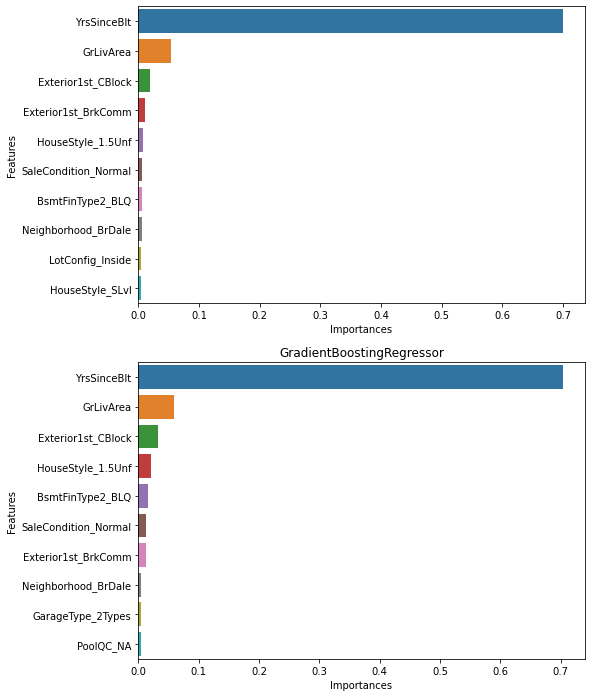

In [46]:
# Group gridsearches & prep plots
grids = [gs_randomForest, gs_gradientBoost]

fig, axs = plt.subplots(2, 1, figsize = (8, 12))

# Find & Plot Feature Importances
for ax, grid in zip(axs.flat, grids):
    bestmodel = grid.best_estimator_.steps[0][1]
    n_pcs = bestmodel.components_.shape[0]
    
    # Apply Pipelined PCA results to get feature names
    most_important = [np.abs(bestmodel.components_[i]).argmax() for i in range(n_pcs)]
    most_important_names = [x_train.columns[most_important[i]] for i in range(n_pcs)]
    
    # Zip & Sort Names and Importances
    zipped_feats = zip(most_important_names, 
                       grid.best_estimator_.steps[1][1].feature_importances_)
    zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=True)
    
    # Get collect best features & importances into importances_df
    bestfeatures, bestimportances = zip(*zipped_feats)
    importance_df = pd.DataFrame({'Features': bestfeatures, 'Importances': bestimportances}).head(10)
    
    # Plot the things
    plt.title(str(grid.estimator.steps[1][1]).split('(')[0])
    sns.barplot(x = importance_df['Importances'], y=importance_df['Features'], ax=ax)

## Opting for Permutation Importance
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)


In addition to avoiding inherent biases of built-in feature importance calculation (described and cited in the documentation of [permutation importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)), SKLearn's **permutation_importance** enables us an easy, syntax-agnostic approach to its application across multiple model types. This should allow us to easily view and contrast the relative importance of features between tuned and non-tuned models.

By way of thoroughness and a demonstration of the usefulness of permutation importance, we can apply it to all of our models simultaneously.

/home/theodore/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


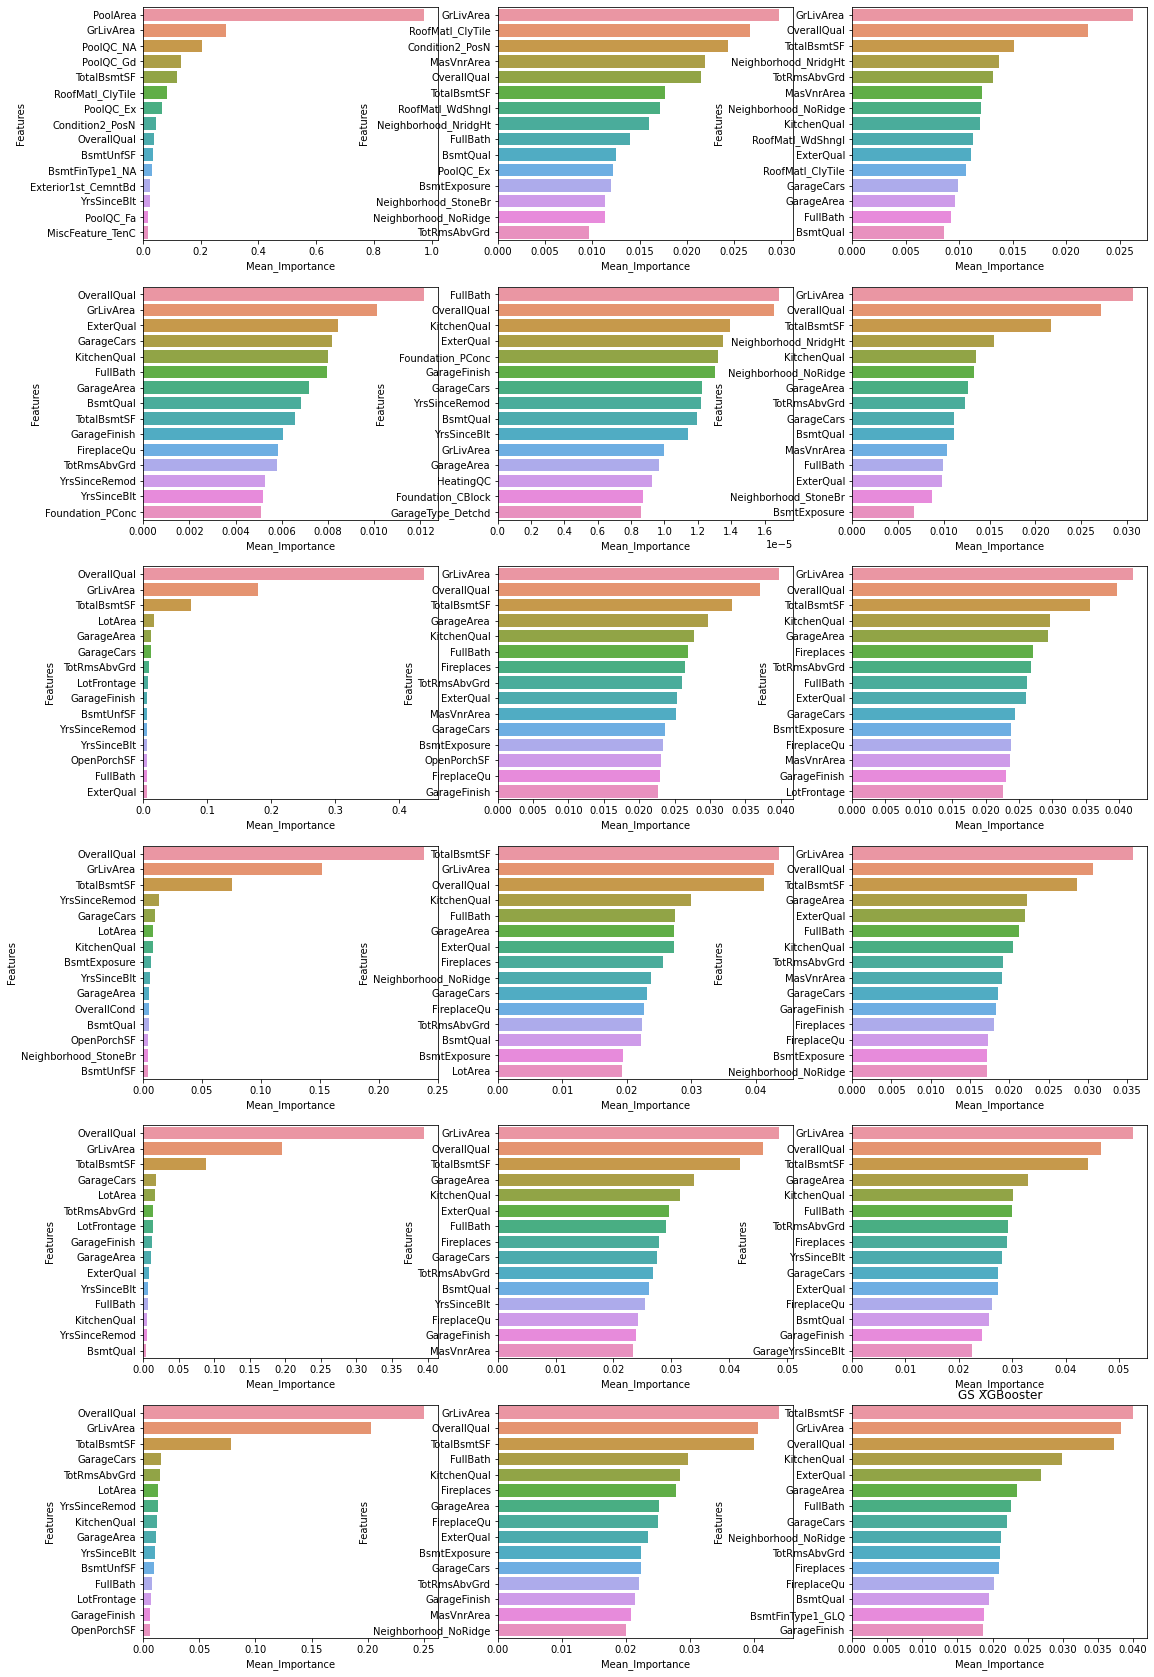

In [47]:
########################################
### Un-Cooked Permutation Importance ###
########################################

from sklearn.inspection import permutation_importance

# Collect all predictive models in use
all_models = [ridge, ridgep, gs_ridge, 
             svr, svrp, gs_svr,
             randomForest, rforestp, gs_randomForest,
             gradientBoost, gboostp, gs_gradientBoost,
             xgForest, xgrfp, gs_xgForest,
             xgBooster, xgbp, gs_xgBooster]
fig, axs = plt.subplots(6, 3, figsize=(18, 30))

# Prepare Plot Names
model_names = ['Ridge Regressor', 'PCA Ridge Regressor', 'GS Ridge Regressor',
              'SV Regressor', 'PCA SV Regressor', 'GS SV Regressor',
              'Random Forest', 'PCA Random Forest', 'GS Random Forest',
              'Gradient Boost', 'PCA Gradient Boost', 'GS Gradient Boost',
              'XGRF Regressor', 'PCA XGRF Regressor', 'GS XGRF Regressor',
              'XGBooster', 'PCA XGBooster', 'GS XGBooster']
m_idx = 0

# Get Permutation Importance & Plot
for ax, mod in zip(axs.flat, all_models):
    perms = permutation_importance(mod, x_train, y_train['SalePrice'],
                                  n_jobs=-2, random_state=430)
    
    # Generate Permutation DF
    perm_imp = pd.DataFrame({'Mean_Importance': list(perms['importances_mean']),
                            'Features': x_train.columns.to_list()})
    perm_imp = perm_imp.sort_values(by='Mean_Importance', ascending=False).head(15)
    
    # Plot
    plt.ylabel('')
    plt.title(model_names[m_idx])
    sns.barplot(x=perm_imp['Mean_Importance'], y=perm_imp['Features'], ax=ax)
    m_idx += 1

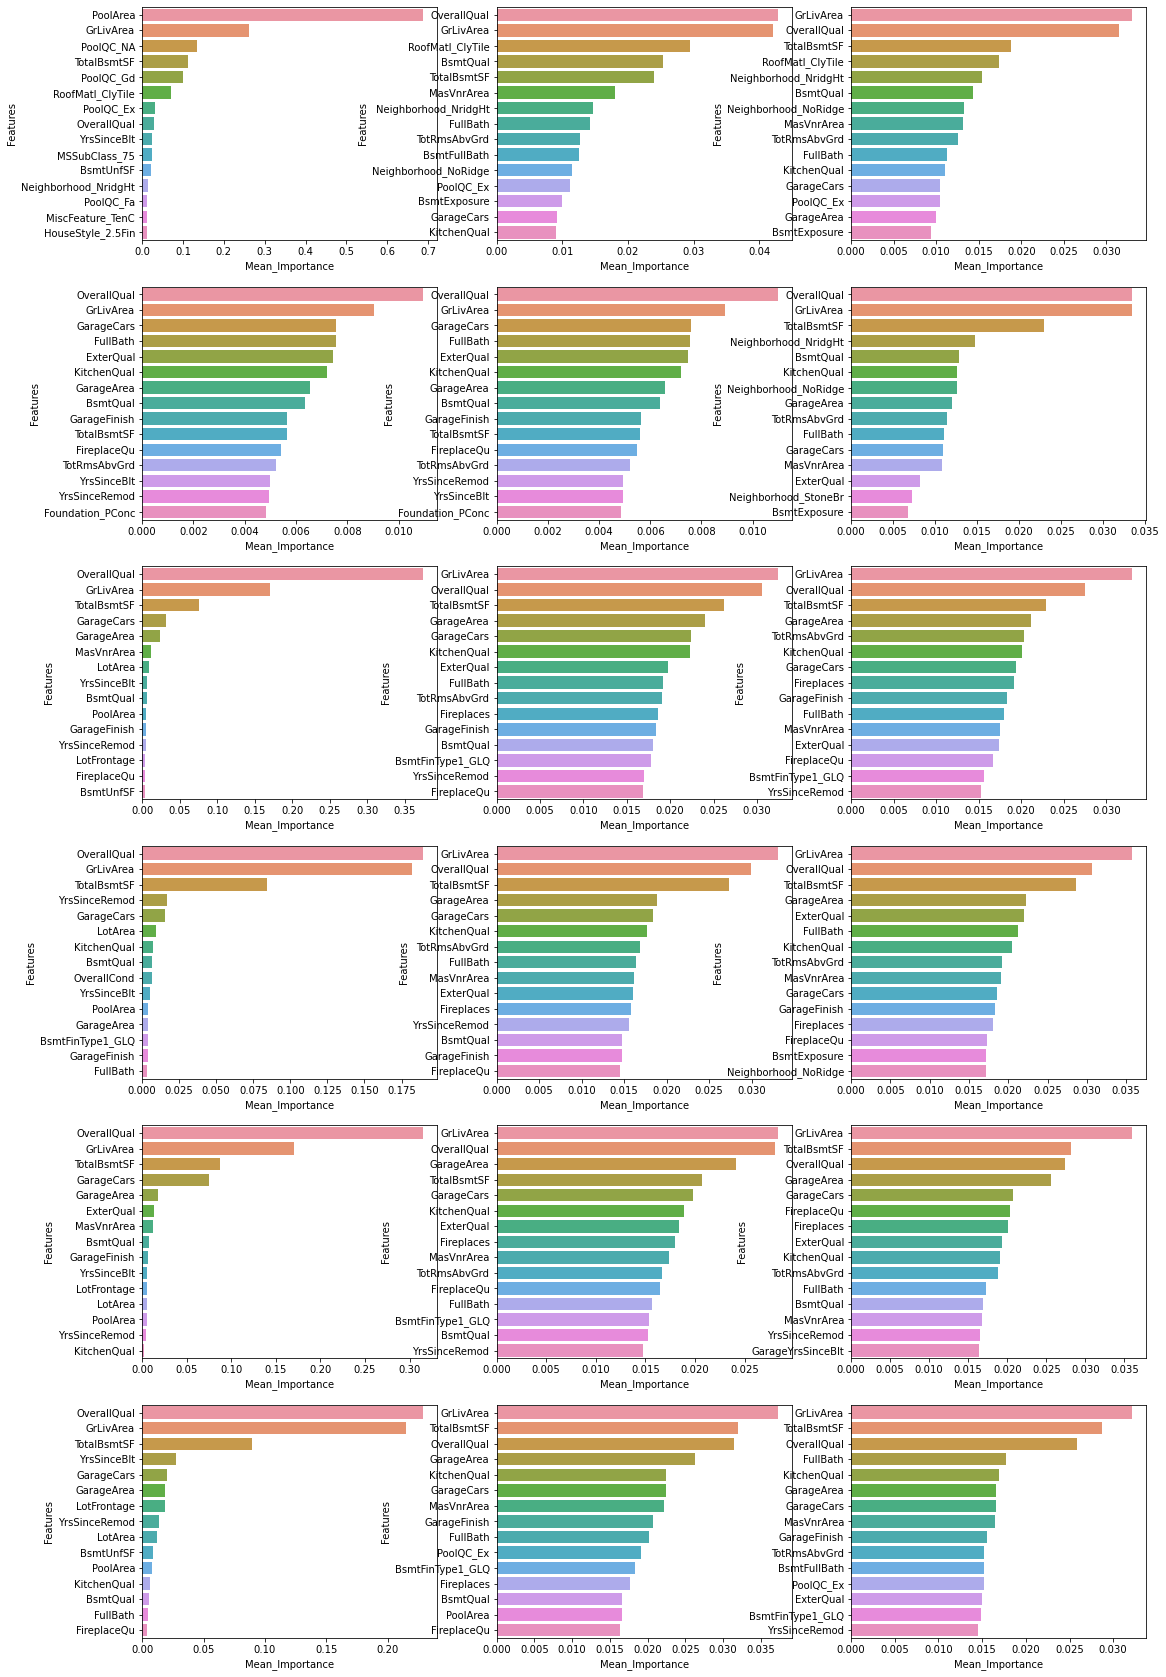

In [50]:
###########################################
### Fully Cooked Permutation Importance ###
###########################################

# Collect all predictive models in use
all_models = [ridge2, ridgep2, cooked_ridge, 
             svr2, svrp2, cooked_svr,
             randomForest2, rforestp2, cooked_randomForest,
             gradientBoost2, gboostp2, gs_gradientBoost,
             xgForest2, xgrfp2, cooked_xgForest,
             xgBooster2, xgbp2, cooked_xgBoost]
fig, axs = plt.subplots(6, 3, figsize=(18, 30))

# Prepare Plot Names
model_names = ['Ridge Regressor', 'PCA Ridge Regressor', 'GS Ridge Regressor',
              'SV Regressor', 'PCA SV Regressor', 'GS SV Regressor',
              'Random Forest', 'PCA Random Forest', 'GS Random Forest',
              'Gradient Boost', 'PCA Gradient Boost', 'GS Gradient Boost',
              'XGRF Regressor', 'PCA XGRF Regressor', 'GS XGRF Regressor',
              'XGBooster', 'PCA XGBooster', 'GS XGBooster']
m_idx = 0

# Get Permutation Importance & Plot
for ax, mod in zip(axs.flat, all_models):
    perms = permutation_importance(mod, x_train, y_train['SalePrice'],
                                  n_jobs=-2, random_state=430)
    
    # Generate Permutation DF
    perm_imp = pd.DataFrame({'Mean_Importance': list(perms['importances_mean']),
                            'Features': x_train.columns.to_list()})
    perm_imp = perm_imp.sort_values(by='Mean_Importance', ascending=False).head(15)
    
    # Plot
    sns.barplot(x=perm_imp['Mean_Importance'], y=perm_imp['Features'], ax=ax)
    plt.ylabel('')
    m_idx += 1

## We Have a Winner: Gradient Boosting!
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

From our results above, we have significant success with Gradient Boosting. As such we can investigate these all much further.

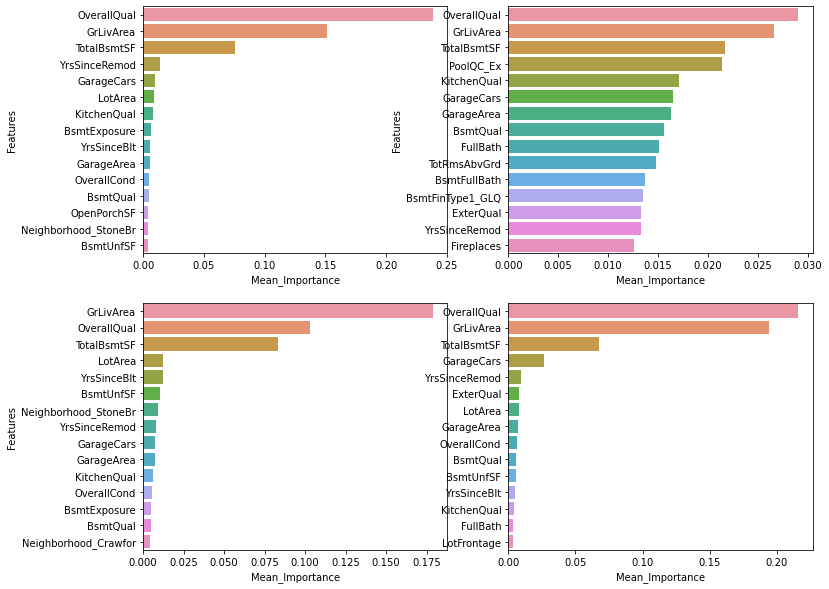

In [51]:
##########################################
### Display GB Permutation Importances ###
##########################################

gboosts = [gradientBoost, cooked_gradientBoost,
          optimized_gradientBoost, optimized_gradientBoost2]

gb_names = ['Uncooked GradientBoost', 'Cooked GradientBoost',
           'Uncooked Optimized GradientBoost', 'Cooked Optimized GradientBoost']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
m_idx = 0

for ax, mod in zip(axs.flat, gboosts):
    perms = permutation_importance(mod, x_train, y_train['SalePrice'],
                                  n_jobs=-2, random_state=430)
    
    # Generate Perm DF
    perm_imp = pd.DataFrame({'Mean_Importance': list(perms['importances_mean']),
                            'Features': x_train.columns.to_list()})
    perm_imp = perm_imp.sort_values(by='Mean_Importance', ascending=False).head(15)
    
    # Plot
    sns.barplot(x=perm_imp['Mean_Importance'], y=perm_imp['Features'], ax=ax)
    plt.ylabel('')
    m_idx += 1

Text(0.5, 1.0, 'No PCA Optimized GradientBoostingRegressor Permutation Importance')

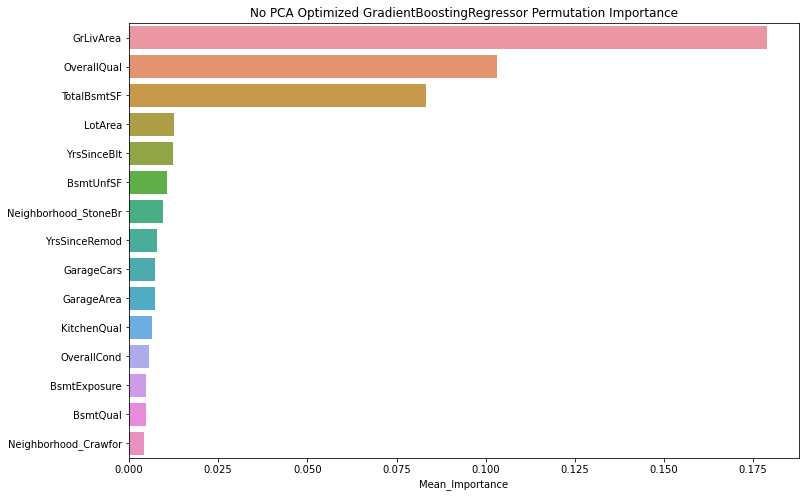

In [52]:
#######################################
### Focus GradientBoostingRegressor ###
#######################################

fig, axs = plt.subplots(figsize=(12, 8))

perms = permutation_importance(optimized_gradientBoost, x_train, y_train['SalePrice'],
                              n_jobs=-2, random_state=430)
perm_imp = pd.DataFrame({'Mean_Importance': list(perms['importances_mean']),
                        'Features': x_train.columns.to_list()})
perm_imp = perm_imp.sort_values(by='Mean_Importance', ascending=False).head(15)

sns.barplot(x=perm_imp['Mean_Importance'], y=perm_imp['Features'])
plt.ylabel('')
plt.title('No PCA Optimized GradientBoostingRegressor Permutation Importance')

# Conclusions
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)

The study we have performed thus far is extremely successful in so far as we have generated some clear predictions with clarity regarding the feature importance. Furthermore we have unearthed an extremely interesting, counterintuitive insight into the usage of PCA. 

### Features of Care
The natures of our most significant features can be gathered into several simple categories:
   - Living Area
   - When the house was Built / Remodeled
   - Garage size
   - Rating
   - Neighborhood
   - Kitchen
    
To anyone familiar with housing searches, it is comforting to see so many familiar faces in the gathering here. Useable, living square footage and rating are the king and queen of our information - thus why these are so often the most chiefly displayed in papaers and other search platforms. From there we see an expansion into the most immediately useful categories, germaine to most searching for a home.

All points above, the top 15 most important features would be worthy of a realtor's attention. However, perhaps of most immediately specific interest would be the details regarding neighborhoods: specifically whether a house be in the Crawford or Stone Brook areas of Ames Iowa would affect the price most more so than the location of any other neighborhood. Thus, from our data, we could suggest to any realtor that these might be the best locations to target for purchase and handling.

### The Care and Handling of Unsupervised Learning
It is easy to fall into the trap of simply accepting unsupervised learning as a superior, carte blanche approach to boosting efficiency of a machine learning problem. However, the nature of PCA in particular is to *explain variance*, not necessarily to select for best predictors of our particular price. What is eliminated may not explain as much variance as other features, yet it might better explain our dependent variable.

### Future Possibilities
Further optimization is always possible, particularly in the data processing stages; where our initial strategy here was to rely on the powers of unsupervised learning to refine our data for us, I would apply myself more consistently to **bespoke data engineering**. The targeted removal of data which contribute only noise as well as logically less useful features would, no doubt, improve our results further. 

Beyond further feature engineering, exploring other machine learning processing techniques may also prove useful. In particular an elegant process of **stacking** could also provide some substantial improvement to our accuracy.

# Generating Predictions
[[Back to Top]](#Iowa-Housing-Pricing:-Modeling-&-Analysis)



In [55]:
testset.shape

(1459, 265)

In [56]:
testset.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YrsSinceBlt,YrsSinceRemod,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,BsmtQual,BsmtCond,BsmtExposure,Functional,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,80.0,11622,5,6,60,60,0.0,270.0,882.0,0,...,2.0,3.0,1.0,7.0,3.0,1.0,0.0,1.0,3.0,3.0
1,81.0,14267,6,6,63,63,108.0,406.0,1329.0,0,...,2.0,3.0,1.0,7.0,3.0,2.0,0.0,1.0,3.0,3.0
2,74.0,13830,5,5,24,23,0.0,137.0,928.0,0,...,3.0,3.0,1.0,7.0,4.0,1.0,3.0,3.0,3.0,3.0
3,78.0,9978,6,6,23,23,20.0,324.0,926.0,0,...,2.0,3.0,1.0,7.0,5.0,2.0,4.0,3.0,3.0,3.0
4,43.0,5005,8,5,29,29,0.0,1017.0,1280.0,0,...,3.0,3.0,1.0,7.0,5.0,2.0,0.0,2.0,3.0,3.0


In [57]:
testset.isna().sum().sum()

0

In [67]:
# Scale Processed Kaggle testset
testset = pd.DataFrame(scale.fit_transform(testset),
                      columns=testset.columns.to_list())

# Generate Predictions from optimized_gradientBoost, best predictor
predictions = pd.DataFrame(optimized_gradientBoost.predict(testset), columns=['SalePrice'])

# Correct ID column to range of 1+, not 0+
predictions = predictions.reset_index()
predictions['index'] = predictions['index'] + 1
predictions.set_index(['index'], inplace=True)

# Export Predictions to csv
predictions.to_csv('AIH_Predictions.csv')